# Task 4
### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
import pandas as pd

# Load the Sentiment140 dataset
data = pd.read_csv('E:/prodigy inturn/Task 4/training.1600000.processed.noemotProdigy_ Internship_Task_4icon.csv', encoding='latin-1', header=None)

# Assign column names
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Display the first few rows
data.head()


C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [2]:
# Drop unnecessary columns
data = data.drop(columns=['id', 'flag', 'user'])


In [3]:
# Convert sentiment labels: 0 for negative, 1 for positive
data['target'] = data['target'].replace({4: 1})


In [4]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    return text

# Apply text cleaning
data['clean_text'] = data['text'].apply(clean_text)


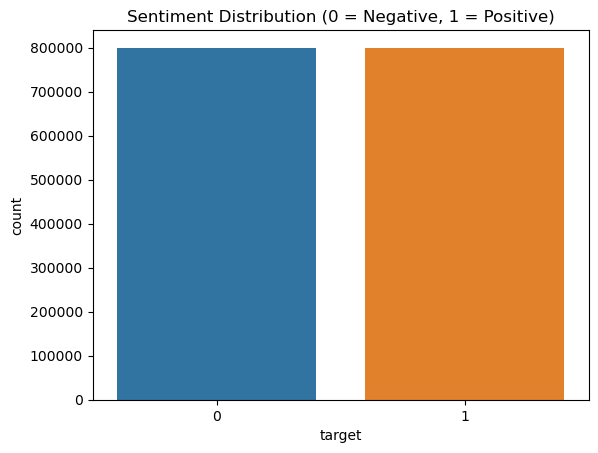

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.countplot(x='target', data=data)
plt.title('Sentiment Distribution (0 = Negative, 1 = Positive)')
plt.show()


In [6]:
data['date'] = pd.to_datetime(data['date'])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1988\271916094.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data['date'] = pd.to_datetime(data['date'])


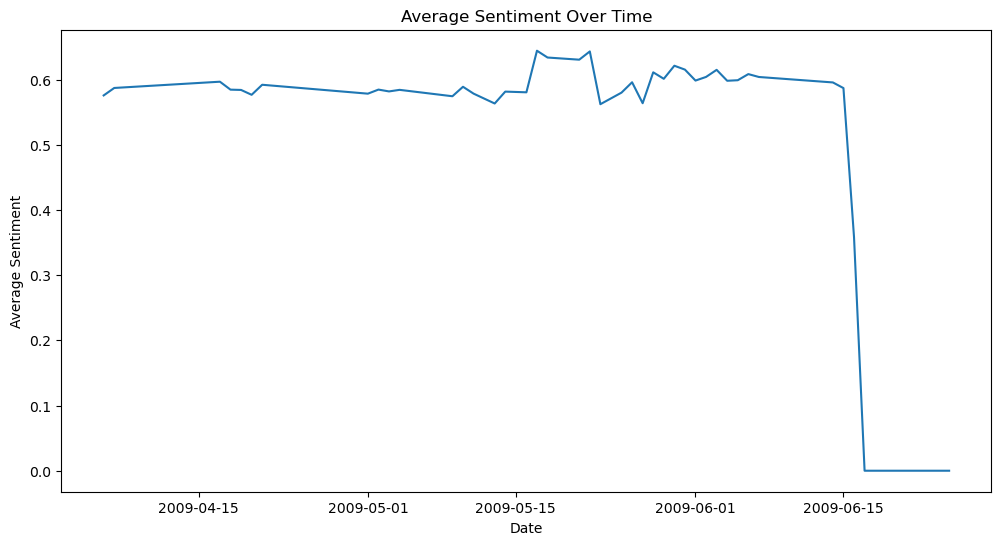

In [7]:
# Group by date and calculate mean sentiment
sentiment_over_time = data.groupby(data['date'].dt.date)['target'].mean()

# Plot sentiment over time
plt.figure(figsize=(12, 6))
sentiment_over_time.plot()
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()


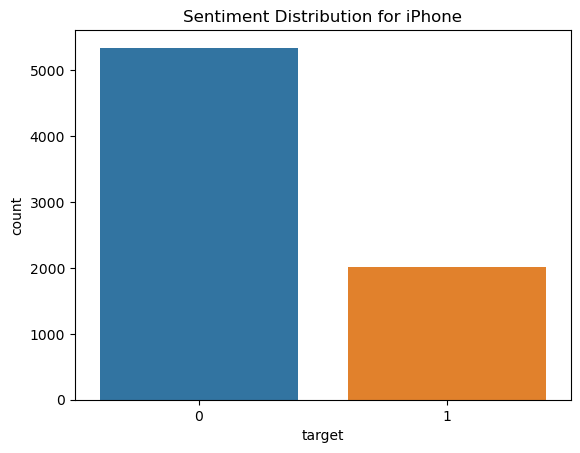

In [8]:
# Filter tweets by keyword (e.g., "iPhone")
brand_data = data[data['clean_text'].str.contains('iphone', case=False)]

# Plot sentiment distribution for the specific brand/topic
sns.countplot(x='target', data=brand_data)
plt.title('Sentiment Distribution for iPhone')
plt.show()


In [17]:
!pip install WordCloud

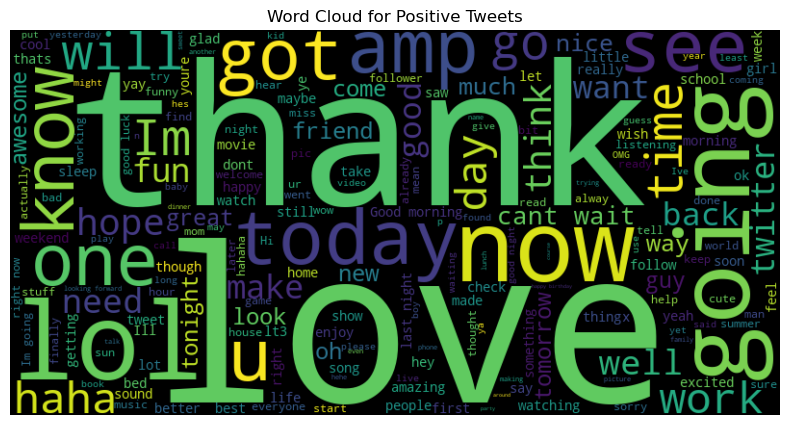

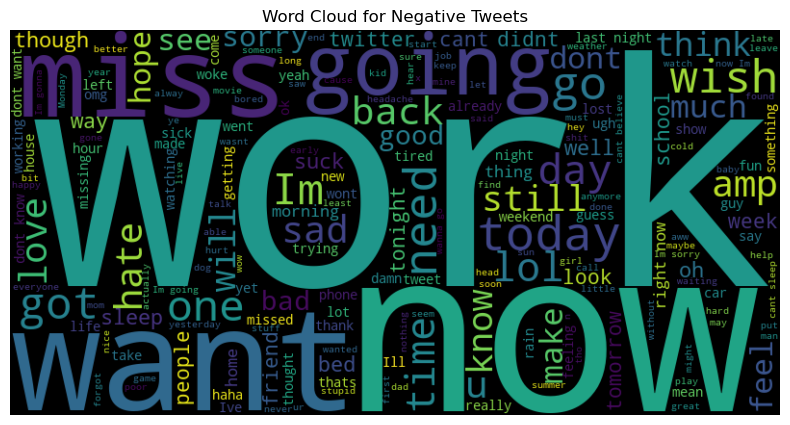

In [14]:
from wordcloud import WordCloud

# Generate word cloud for positive sentiment
positive_text = ' '.join(data[data['target'] == 1]['clean_text'])
wordcloud_positive = WordCloud(width=800, height=400).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()

# Generate word cloud for negative sentiment
negative_text = ' '.join(data[data['target'] == 0]['clean_text'])
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets')
plt.axis('off')
plt.show()


#  Conclusion and Insights
Based on your analysis and visualizations, you can derive insights such as:

Overall sentiment distribution (positive vs negative).
How sentiment changes over time.
Sentiment towards specific topics or brands.
Common words associated with positive and negative sentiments.
Tools/Libraries Used:
Pandas: For data loading and manipulation.
Matplotlib/Seaborn: For visualizations.
WordCloud: For generating word clouds.
Regular Expressions (re): For text cleaning and preprocessing.
By following these steps, you can analyze sentiment patterns in social media data and gain insights into public opinion and attitudes toward specific topics or brands.